In [388]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt





In [389]:

raw_csv_data =  pd.read_csv("N:\\TESE\\Bullwhip\\data\\input\\real_data_interpolated.csv", delimiter=None, names=["value"])
forex_data =  pd.read_csv("N:\\TESE\\Bullwhip\\data\\input\\data_amplified.csv", delimiter=None)


# temp_df = raw_csv_data.copy()


def add_timeline(series):
    "adds timeline to series"
    reference_date = datetime.date(2022,1,1)
    time_series = pd.Series(pd.date_range(start = reference_date - datetime.timedelta(len(series)-1)
                                , end = datetime.date(2022,1,1)
                                , freq='D'), 
                            name="date")
    
    return pd.concat([time_series,series],axis=1)



In [390]:
df_forex = add_timeline(forex_data)
df_forex.name="Forex data"
df_orders = add_timeline(raw_csv_data)
df_orders.name="Orders data"




In [391]:
df_forex.head(), df_orders.head()

(        date  value
 0 2006-04-16  10090
 1 2006-04-17  10305
 2 2006-04-18  10368
 3 2006-04-19  10388
 4 2006-04-20  10284,
         date   value
 0 2012-02-04  3459.0
 1 2012-02-05  3459.0
 2 2012-02-06  3459.0
 3 2012-02-07  3459.0
 4 2012-02-08  3459.0)

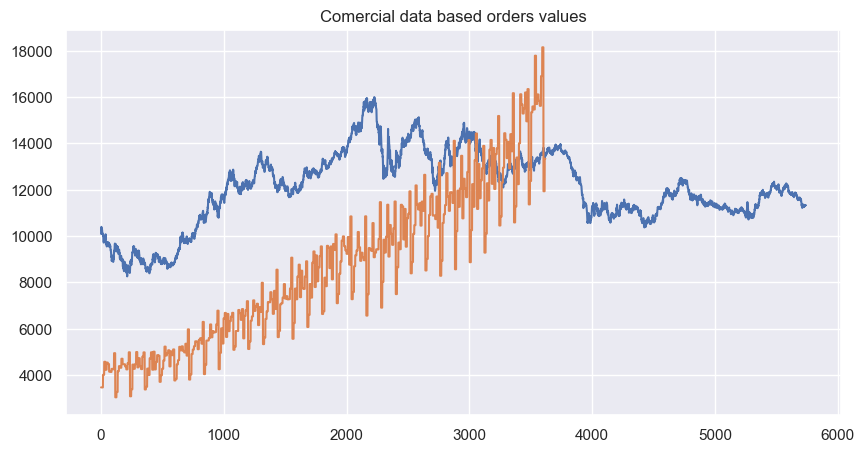

In [392]:
df_forex.value.plot(title = "Forex based orders values")
df_orders.value.plot(title = "Comercial data based orders values")
plt.show()

# OQ Test

In [393]:
import scipy.stats
import pylab

((array([-3.55158549, -3.31105051, -3.17820589, ...,  3.17820589,
          3.31105051,  3.55158549]),
  array([ 3031.,  3031.,  3031., ..., 18139., 18139., 18139.])),
 (3324.8436050994565, 8511.951104972375, 0.9786171081287508))

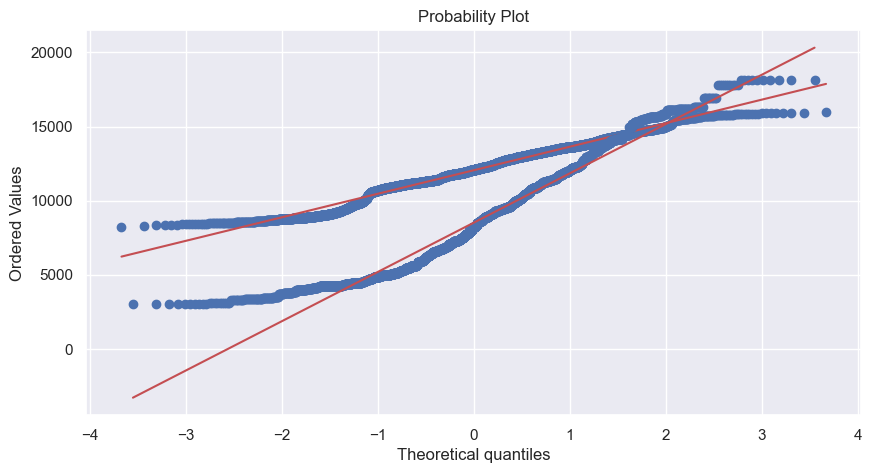

In [394]:
scipy.stats.probplot(df_forex.value, plot=pylab)
scipy.stats.probplot(df_orders.value, plot=pylab)

conclusion: none of the samples are normally distributed

((array([-3.55158549, -3.31105051, -3.17820589, ...,  3.17820589,
          3.31105051,  3.55158549]),
  array([ 3031.,  3031.,  3031., ..., 18139., 18139., 18139.])),
 (3324.8436050994565, 8511.951104972375, 0.9786171081287508))

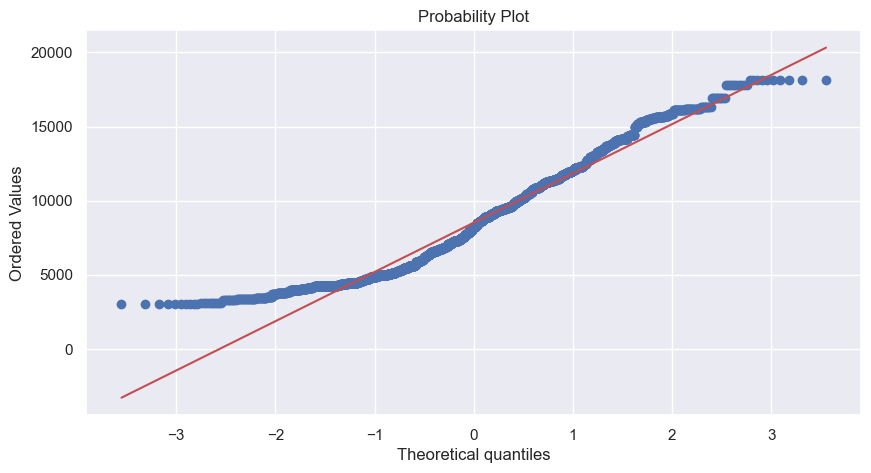

In [395]:
scipy.stats.probplot(df_orders.value, plot=pylab)

In [396]:
#Set indexes:
df_orders.set_index("date", inplace=True)
df_forex.set_index("date", inplace=True)

# spliting the data

In [397]:
def split_train_data(df=pd.DataFrame, ratio=0.8):
    size = int(len(df)*ratio)
    train = df.iloc[:size]
    test = df.iloc[size:]
    return train, test

In [398]:
train_orders, test_orders = split_train_data(df_orders)
train_forex, test_forex  = split_train_data(df_forex)



# white noise

In [399]:
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

In [400]:

plt.show()

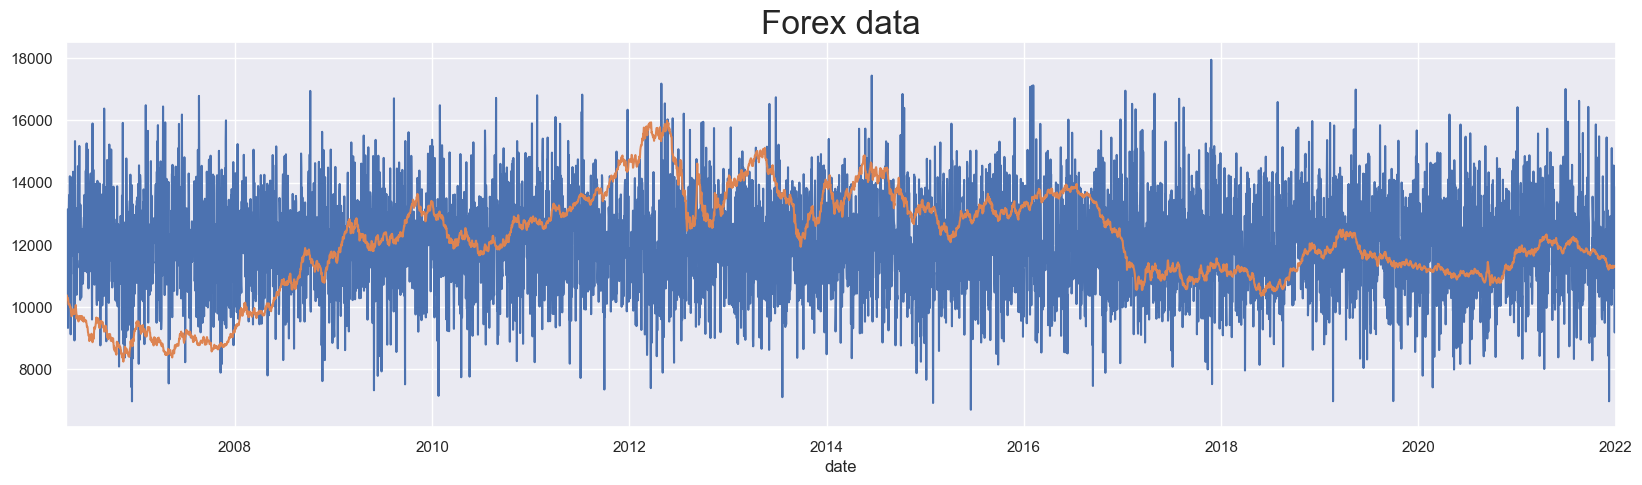

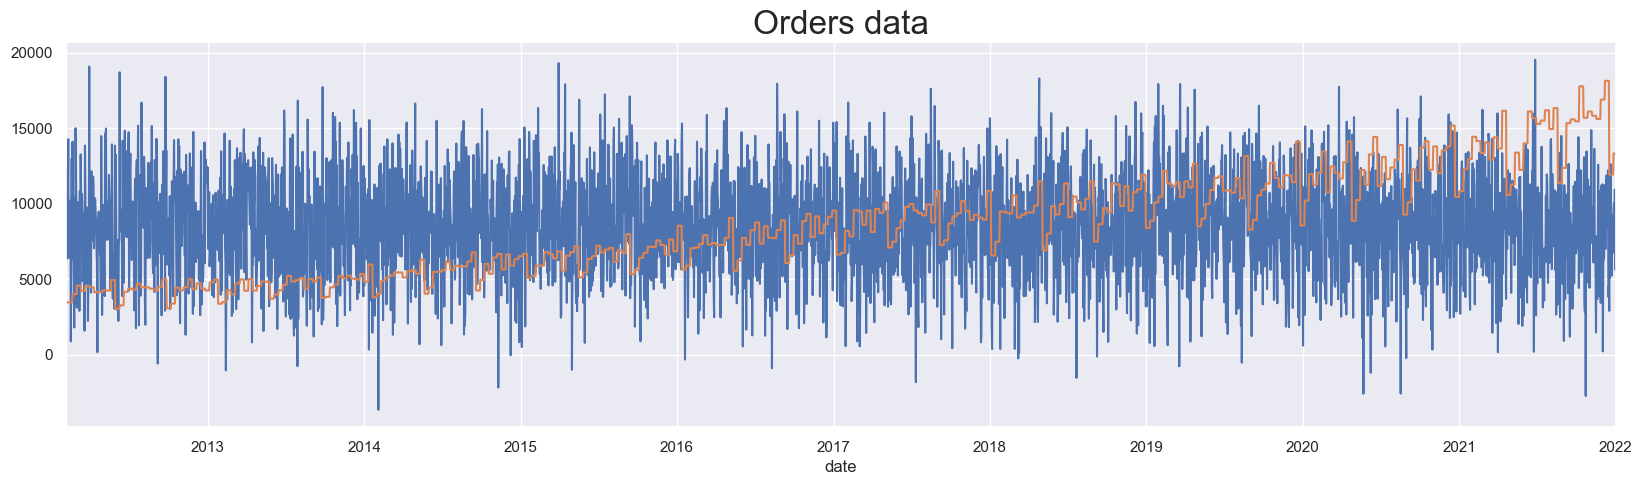

In [401]:
from tkinter import colorchooser


def while_noise_plots(df):
    wn = np.random.normal(loc = df.value.mean(), scale = df.value.std(), size = len(df))

    df['wn'] = wn
    df.wn.plot(figsize = (20,5) )
    df.value.plot(figsize = (20,5))
    plt.title(df.name, size = 24)
    plt.show()
for df in [df_forex, df_orders]:
    while_noise_plots(df)

# teste de estacionalidade

In [402]:
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts


In [403]:
print(sts.adfuller(df_forex.value))

print(sts.adfuller(df_orders.value))



(-1.9653113958278663, 0.301986819560099, 15, 5724, {'1%': -3.43149294811129, '5%': -2.8620450735350436, '10%': -2.5670388488366074}, 64942.743407417016)
(-1.6195468473051409, 0.4729668765859368, 30, 3589, {'1%': -3.4321733444512503, '5%': -2.862345651385977, '10%': -2.5671988611505343}, 53044.186810170446)


15 % de prob de não ser estacionario no forex e 30 nas orders 

# teste de sazonalidade


In [404]:
#naive decomposation
from statsmodels.tsa.seasonal import seasonal_decompose


In [405]:

forex_s_dec_additive = seasonal_decompose(df_forex.value, model = "additive")




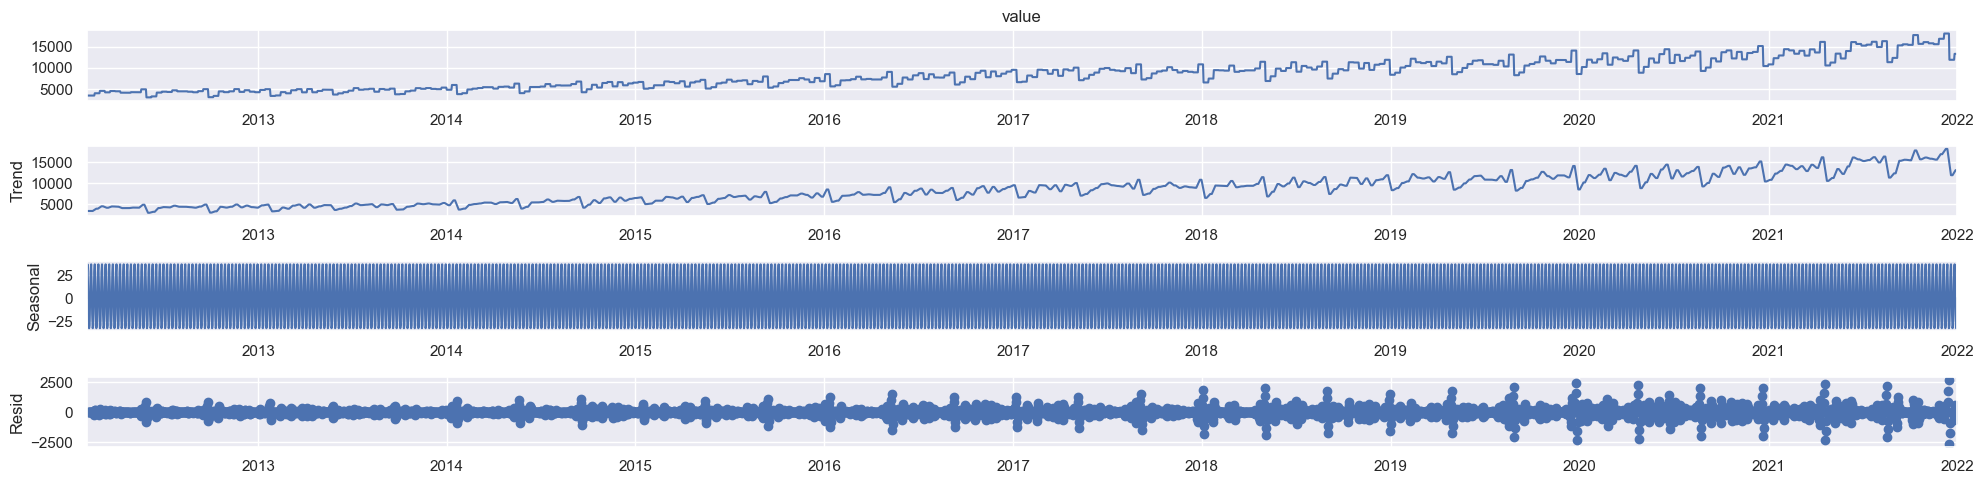

In [406]:
plt.rcParams['figure.figsize'] = [20, 5]

orders_s_dec_additive = seasonal_decompose(df_orders.value, model = "additive")
orders_s_dec_additive.plot()
plt.show()

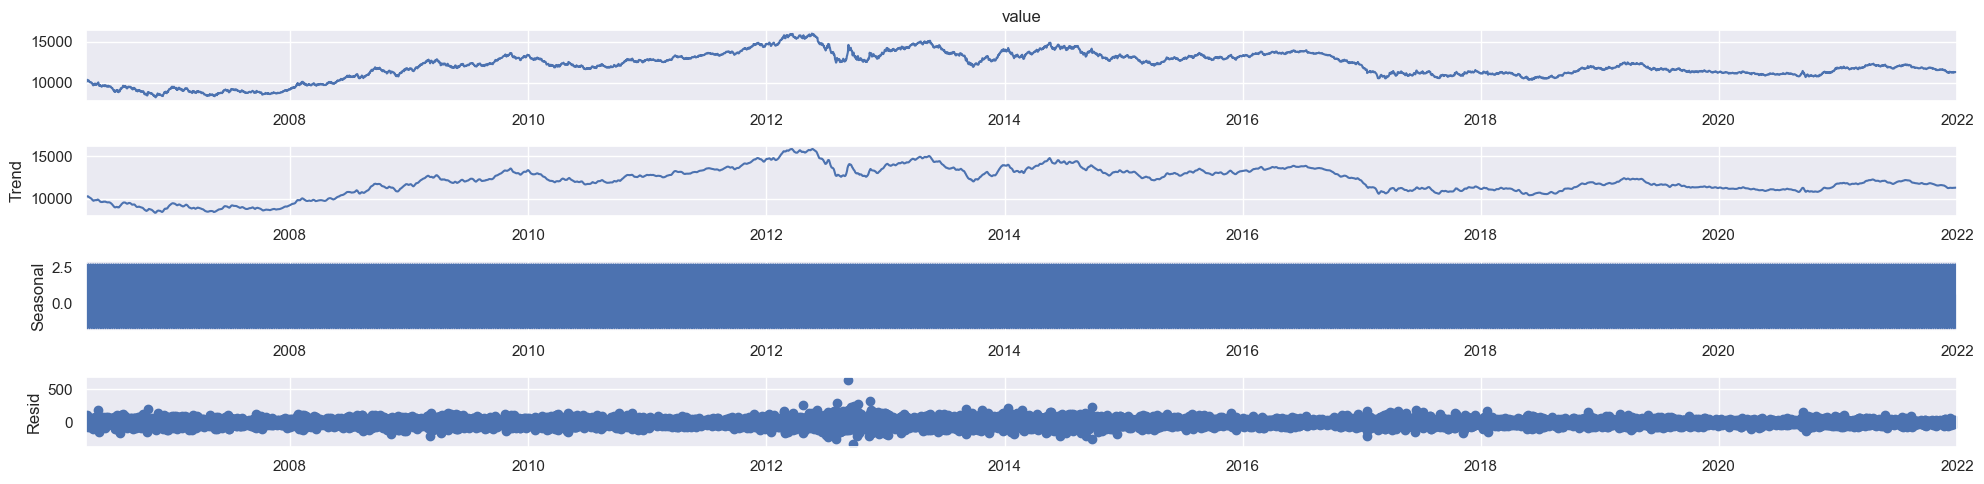

In [407]:
forex_s_dec_additive = seasonal_decompose(df_forex.value, model = "additive")
forex_s_dec_additive.plot()
plt.show()

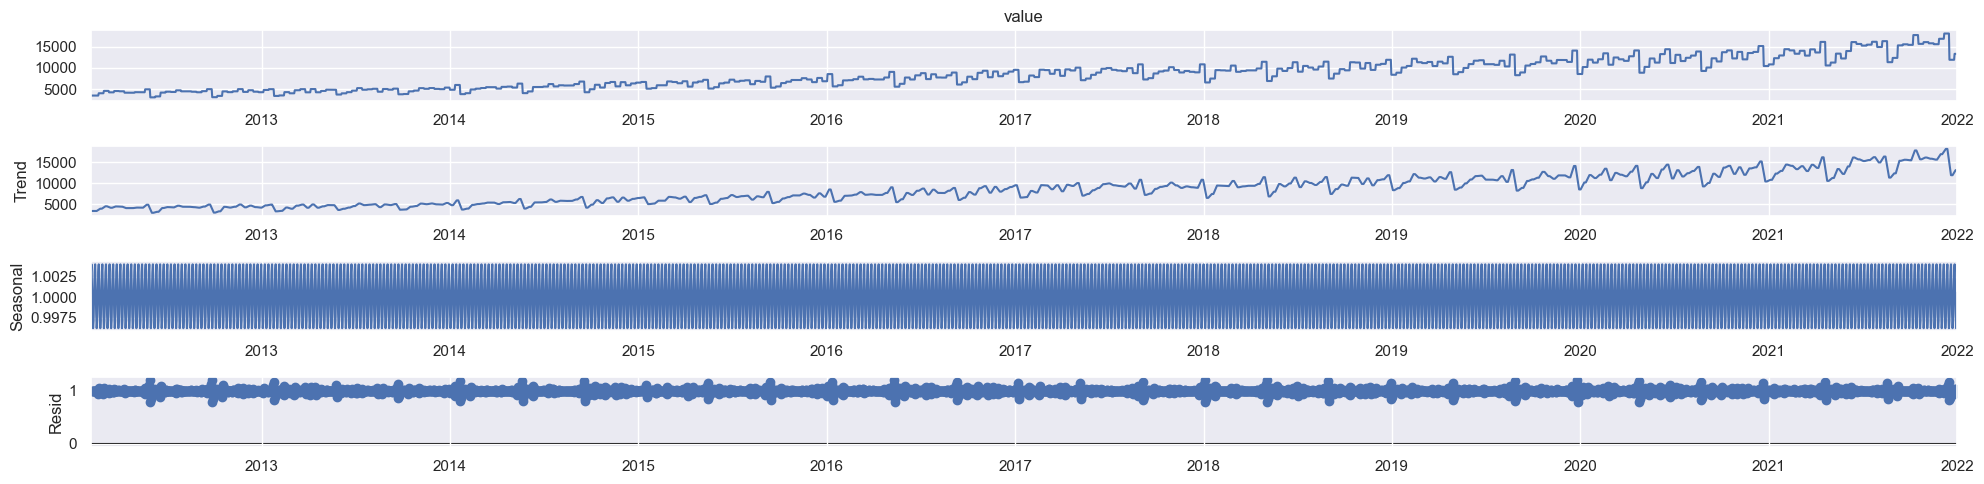

In [408]:
orders_s_dec_multiplicative = seasonal_decompose(df_orders.value, model = "multiplicative")
orders_s_dec_multiplicative.plot()
plt.show()

In [409]:
plt.rcParams['figure.figsize'] = [10, 5]


# autocorrelation

<function matplotlib.pyplot.show(close=None, block=None)>

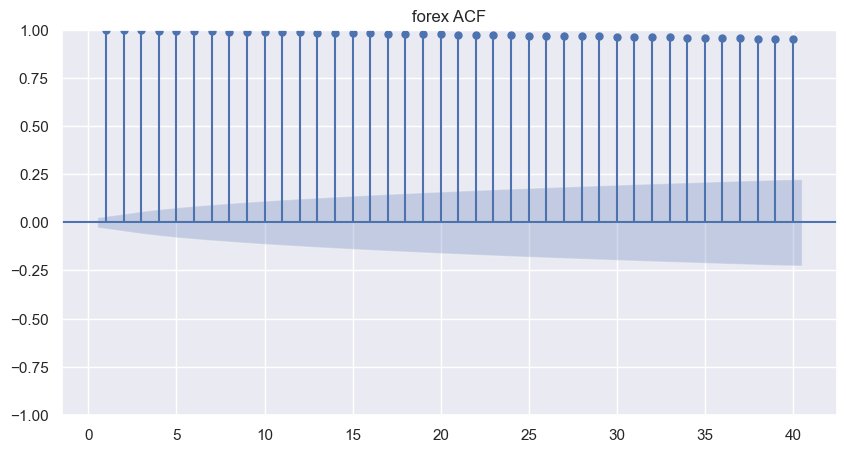

In [410]:
sgt.plot_acf(df_forex.value, lags=40, zero=False)
plt.title("forex ACF", size=12)
plt.show

Text(0.5, 1.0, 'forex ACF')

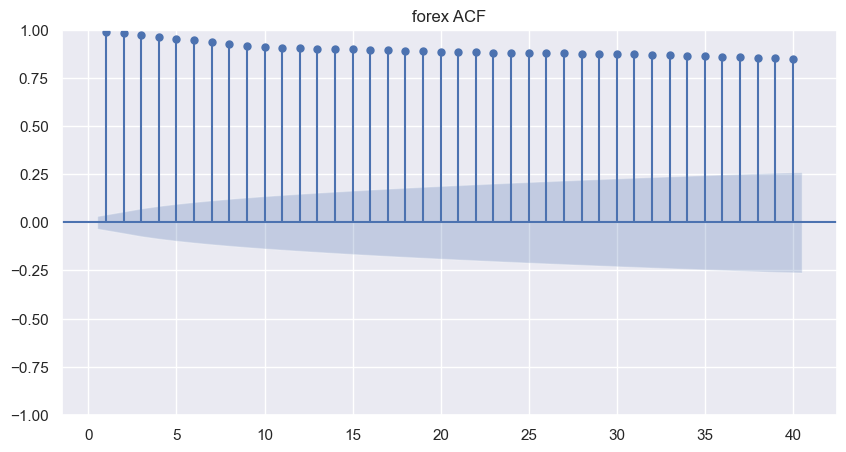

In [411]:
sgt.plot_acf(df_orders.value, lags=40, zero=False)
plt.title("forex ACF")

Text(0.5, 1.0, 'forex ACF')

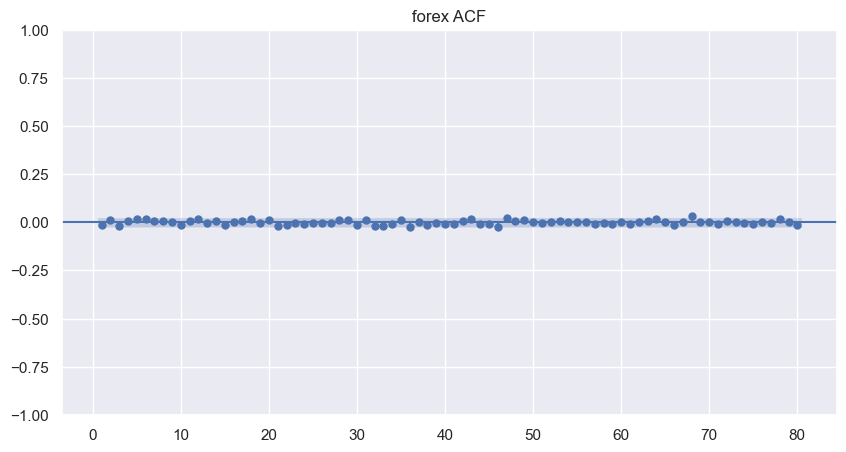

In [412]:
sgt.plot_acf(df_forex.wn, lags=80, zero=False)
plt.title("forex ACF")

Text(0.5, 1.0, 'forex ACF')

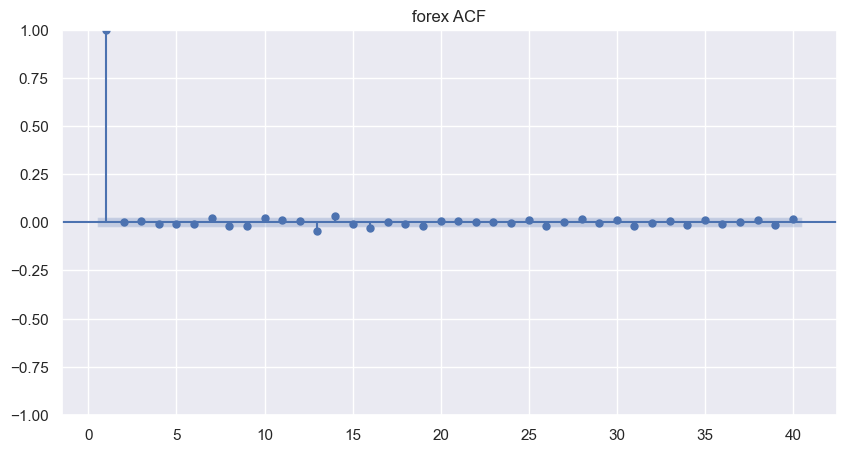

In [413]:
#PACF
sgt.plot_pacf(df_forex.value, lags=40, zero=False, method=('ols'))
plt.title("forex ACF")

Text(0.5, 1.0, 'orders ACF')

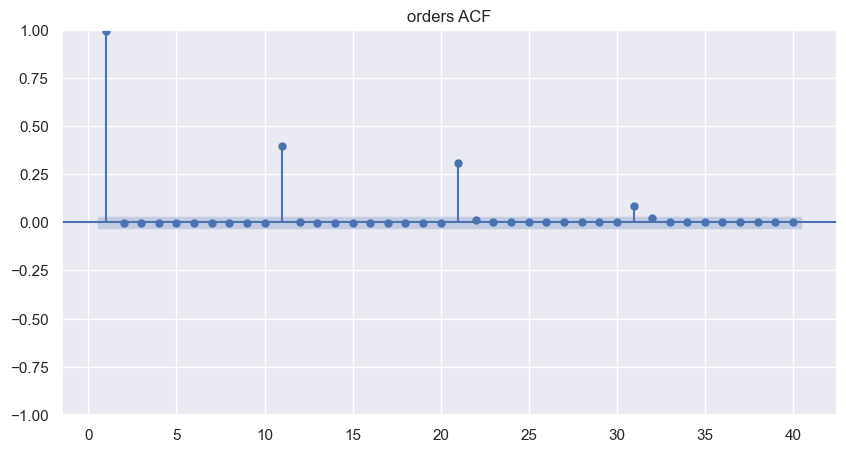

In [414]:
#PACF
sgt.plot_pacf(df_orders.value, lags=40, zero=False, method=('ols'))
plt.title("orders ACF")

# Pick the correct model

In [415]:
#AR(1) model

from statsmodels.tsa.arima.model import ARIMA

forex_model_ar = ARIMA(df_forex.value, order= (3,0,0)).fit()
orders_model_ar = ARIMA(df_orders.value, order= (2,0,0)).fit()

c:\ProgramData\Anaconda3\envs\bullwhip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\Anaconda3\envs\bullwhip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\Anaconda3\envs\bullwhip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\Anaconda3\envs\bullwhip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\Anaconda3\envs\bullwhip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency i

In [416]:
forex_model_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                 5740
Model:                 ARIMA(3, 0, 0)   Log Likelihood              -32677.388
Date:                Sat, 30 Jul 2022   AIC                          65364.776
Time:                        16:06:29   BIC                          65398.052
Sample:                    04-16-2006   HQIC                         65376.358
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.205e+04    719.826     16.739      0.000    1.06e+04    1.35e+04
ar.L1          0.9947      0.008    117.619      0.000       0.978       1.011
ar.L2         -0.0047      0.015     -0.311      0.756      -0.035       0.025
ar.L3          0.0089      0.010      0.854      0.393      -0.012       0.029
sigma2      5143.4553     54.869     93.741      0.000    5035.915    5250.996
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              4630.97
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.68   Skew:                            -0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [422]:
forex_model_ar_1 = ARIMA(df_forex.value, order= (1,0,0)).fit()
forex_model_ar_2 = ARIMA(df_forex.value, order= (2,0,0)).fit()
forex_model_ar_3 = ARIMA(df_forex.value, order= (3,0,0)).fit()
forex_model_ar_4 = ARIMA(df_forex.value, order= (4,0,0)).fit()


c:\ProgramData\Anaconda3\envs\bullwhip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\Anaconda3\envs\bullwhip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\Anaconda3\envs\bullwhip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\Anaconda3\envs\bullwhip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\Anaconda3\envs\bullwhip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency i

In [426]:
print(forex_model_ar_1.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                 5740
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -32677.671
Date:                Sat, 30 Jul 2022   AIC                          65361.343
Time:                        16:09:15   BIC                          65381.308
Sample:                    04-16-2006   HQIC                         65368.292
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.205e+04    690.750     17.443      0.000    1.07e+04    1.34e+04
ar.L1          0.9989      0.001   1845.837      0.000       0.998       1.000
sigma2      5150.7194     54.173     95.079      0.0

In [427]:
print(forex_model_ar_2.summary())



                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                 5740
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -32677.618
Date:                Sat, 30 Jul 2022   AIC                          65363.237
Time:                        16:09:30   BIC                          65389.857
Sample:                    04-16-2006   HQIC                         65372.502
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.205e+04    711.174     16.942      0.000    1.07e+04    1.34e+04
ar.L1          0.9947      0.008    123.385      0.000       0.979       1.011
ar.L2          0.0042      0.008      0.516      0.6

In [428]:
print(forex_model_ar_3.summary())


                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                 5740
Model:                 ARIMA(3, 0, 0)   Log Likelihood              -32677.388
Date:                Sat, 30 Jul 2022   AIC                          65364.776
Time:                        16:09:34   BIC                          65398.052
Sample:                    04-16-2006   HQIC                         65376.358
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.205e+04    719.826     16.739      0.000    1.06e+04    1.35e+04
ar.L1          0.9947      0.008    117.619      0.000       0.978       1.011
ar.L2         -0.0047      0.015     -0.311      0.7

In [429]:
print(forex_model_ar_4.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                 5740
Model:                 ARIMA(4, 0, 0)   Log Likelihood              -32677.248
Date:                Sat, 30 Jul 2022   AIC                          65366.496
Time:                        16:09:36   BIC                          65406.427
Sample:                    04-16-2006   HQIC                         65380.394
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.205e+04    719.325     16.750      0.000    1.06e+04    1.35e+04
ar.L1          0.9948      0.009    115.359      0.000       0.978       1.012
ar.L2         -0.0048      0.015     -0.312      0.7

# Jumpo to auto-arima

In [417]:
#train_orders, test_orders,  train_forex, test_forex


In [418]:
forex_data["ret"]=forex_data.pct_change(1)*100 


In [419]:
forex_data["ret"]

0            NaN
1       2.130823
2       0.611354
3       0.192901
4      -1.001155
          ...   
5735   -0.044181
5736    0.167963
5737   -0.247110
5738    0.274263
5739   -0.070584
Name: ret, Length: 5740, dtype: float64

In [420]:
from pmdarima import auto_arima


forex_model_auto= auto_arima(forex_data.ret[1:])

In [421]:
forex_model_auto

ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)